# CS 109A/AC 209A/STAT 121A Data Science: Homework 4
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 5th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

# Additional for cross validation
from sklearn.cross_validation import KFold

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Bassily, Hany

### Part (b): Course Number

CS E-109A

### Part (c): Who did you work with?

None

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

### <font color = 'blue'>Solution:</font>
<br>
**1. Load Data set and inspect it:**

In [2]:
# Load the data set:
data_raw = pd.read_csv('datasets\dataset_1.txt')
data_raw.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117
5,0.037635,0.037635,0.037635,0.337794,0.615117,0.567644,0.589955,0.648310,0.061586,0.561851,-0.025617
6,0.548117,0.548117,0.548117,0.116262,0.113592,0.087629,0.111386,0.928244,0.121747,0.221628,0.297171
7,0.892827,0.892827,0.892827,0.281551,0.416681,0.348842,0.351801,0.594220,0.712219,0.885876,-0.370487
8,0.742638,0.742638,0.742638,0.346271,0.501471,0.461488,0.473039,0.154119,0.754183,0.615930,-0.580507
9,0.019027,0.019027,0.019027,0.090675,0.092674,0.077819,0.094770,0.295878,0.705932,0.865741,-0.415906


Data includes 10 predictors. From the table above, it is clear that the first three columns are the same. The following is a scatter plot to visualize the interaction between the predictors and visualize the equality of the first three predictors.

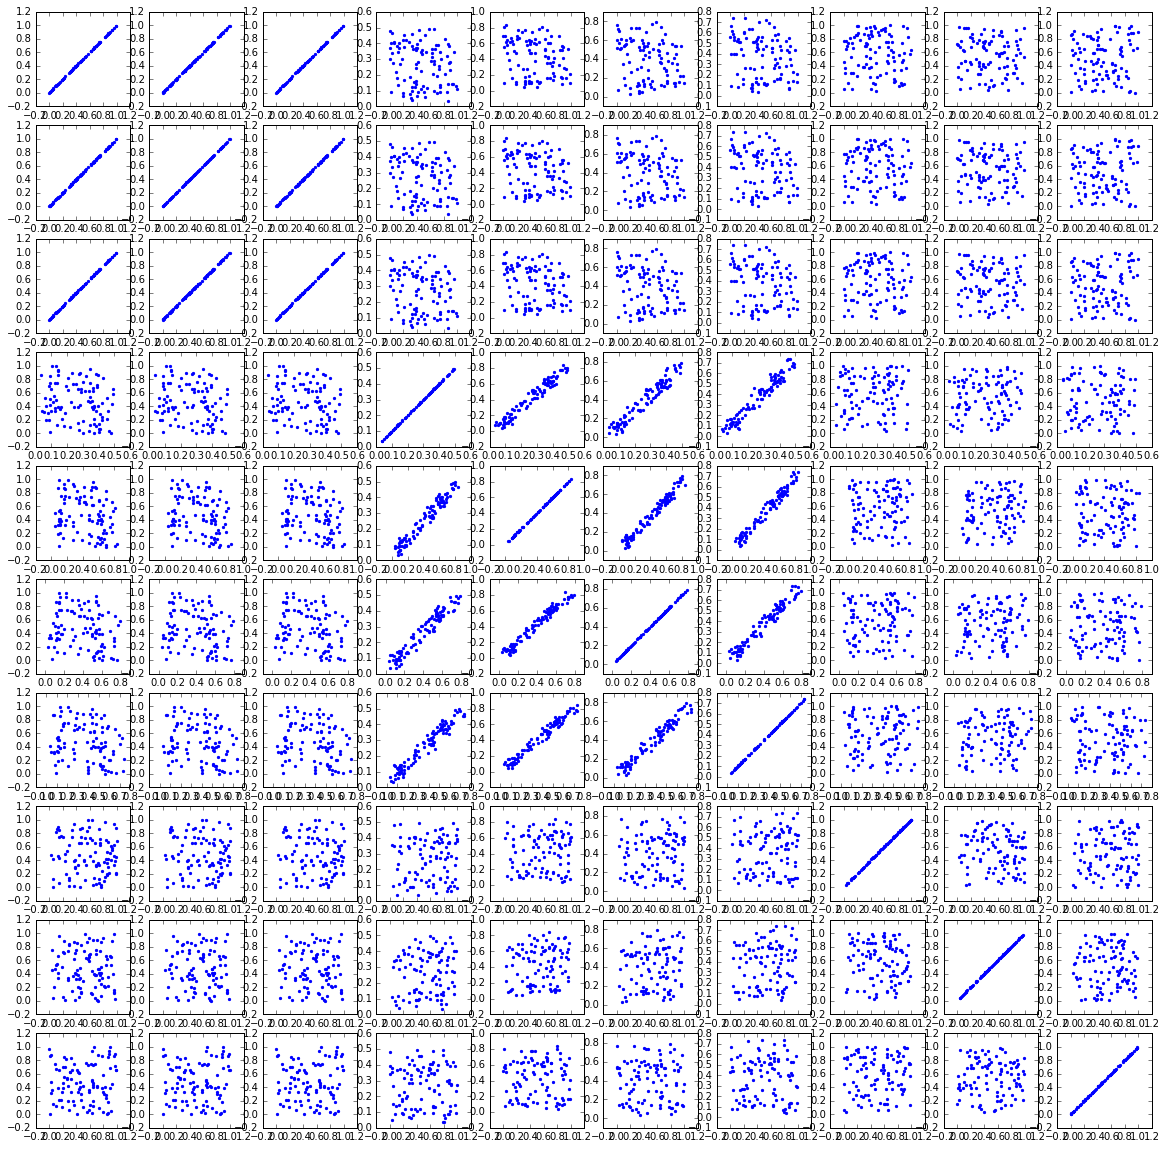

In [3]:
# Visualize the interaction between the different predictors

fig = plt.figure(figsize = (20,20))
n_plot = 0
for i in range(10):
    for j in range(10):
        n_plot +=1
        ax =fig.add_subplot(10,10,n_plot)
        ax.scatter(data_raw.iloc[:,i], data_raw.iloc[:,j] , marker = '.' , color = 'blue')
plt.show()

- The scatter plot confirms the fact that predictors 0,1 and 2 are equal by displaying a perfect linear relation between them. It also shows that a colinearity may exists between predictors 3,4,5 and 6. 
- More confirmation from the coefficients of correlation

**2. Coefficients of correlation:**
<br>

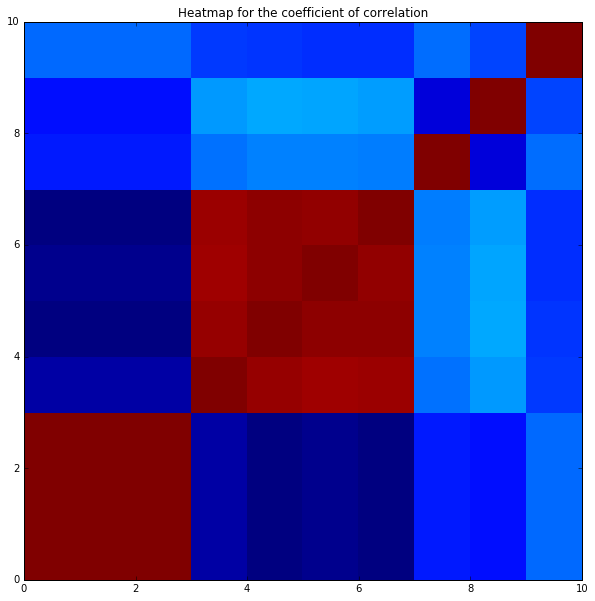

In [4]:
# Extract predictors and observation from the data frame
data_x , data_y = data_raw.iloc[:,:-1].values , data_raw.iloc[:,-1].values

# Calculate the correlation coefficients
corr_matrix = np.corrcoef(data_x.T)

# Heatmap of the correlation
fig , ax = plt.subplots(1,1, figsize = (10,10))
ax.pcolor(corr_matrix)
ax.set_title('Heatmap for the coefficient of correlation')
plt.show()

The correlation heatmap confirms the findings obtained from the first analysis. A perfect correlation between the first three predictors confirming the equality that was previously deduced. Also it shows a strong correlation between predictors 3,4,5 and 6 as detected in the scatter plot.

**3. Predictor groups and heuristic selection:**<br>

- From the correlation heat map and the preliminary data investigation, the predictors can be classified into 5 groups:
    * First group includes predictors 0,1 and 2 which are equal
    * Second group includes predictors 3,4,5 and 6 which are strongly correlated
    * the last three predictors each has its own group as they are not correlated and each could have its considerable contribution to the model
    
- Based on the the colinearity between the predictors, the minimal number of predictors to be considered for a linear regression model would include one predictor from each group. 
- A proposed configuration would be [ predictor 0, predictor 4, predictor 7, predictor 8 and predictor 9]

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection **or** Step-wise backward selection  

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use the `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

### <font color = 'blue'>Solution:</font>
<br>
**1. Exhaustive Search:**<br>

In [5]:
# Based on code from Section 5 (Prof. Pavlos Protopapas)

# Initialization:
#----------------

# intitaion of a minimum bic
min_bic = 1e10 

# initiation of the best subset configuration
best_subset = [] 


# Exhaustive Iterration Algorithm:
# --------------------------------

# Repeat for every possible size of subset
for size_k in range(10): 
    
    # Create all possible subsets 
    subsets_of_size_k = it.combinations(range(10), size_k + 1) 
    
    # set some initial small value for max R^2 score
    max_r_squared = 0.0 
    
    # best subset of predictors of size k
    best_k_subset = [] 
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:    
        
        # Use only a subset of predictors in the training data
        x_subset = data_x[:, predictor_subset]

        # Fit and evaluate R^2
        model = OLS(data_y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Update max R^2 and best predictor subset of size k
        if(r_squared > max_r_squared): 
            max_r_squared = r_squared
            best_k_subset = predictor_subset[:]
                

    # Use only the best subset of size k for the predictors
    x_subset = data_x[:, best_k_subset]
        
    # Fit and evaluate BIC of the best subset of size k
    model = OLS(data_y, x_subset)
    results = model.fit()
    bic = results.bic
    
    # Update minimum BIC and best predictor subset
    if(bic < min_bic): 
        min_bic = bic
        best_subset = best_k_subset[:]
    
print('\nBest subset by exhaustive search:')
print sorted(best_subset), '\n'


Best subset by exhaustive search:
[0, 5, 7, 8, 9] 



**2. Stepwise Forward:**<br>

In [6]:
# Based on code from Section 5 (Prof. Pavlos Protopapas)

# Initialization:
# ---------------

# total no. of predictors
d = data_x.shape[1] 

# Keep track of current set of chosen predictors, and the remaining set of predictors
current_predictors = [] 
remaining_predictors = range(d)

# Set some initial large value for min BIC score for all possible subsets
global_min_bic = 1e10 

# Keep track of the best subset of predictors
best_subset = [] 

# Stepwise Forward Algorithm:
# ---------------------------

# Iterate over all possible subset sizes, 0 predictors to d predictors
for size in range(d):
    
    # set some initial small value for max R^2
    max_r_squared = 0.0 
    
    # set some initial large value for BIC score
    bic_with_best_predictor = 1e10    
        
    # Iterate over all remaining predictors to find best predictor to add
    for i in remaining_predictors:
        
        # Make copy of current set of predictors
        temp = current_predictors[:]
        
        # Add predictor 'i'
        temp.append(i)
                                    
        # Use only a subset of predictors in the training data
        x_subset = data_x[:, temp]
        
        # Fit and evaluate R^2
        model = OLS(data_y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Check if we get a higher R^2 value than than current max R^2, if so, update
        if(r_squared > max_r_squared):
            max_r_squared = r_squared
            best_predictor = i
            bic_with_best_predictor = results.bic
    
    # Remove best predictor from remaining list, and add best predictor to current list
    remaining_predictors.remove(best_predictor)
    current_predictors.append(best_predictor)
    
    # Check if BIC for with the predictor we just added is lower than 
    # the global minimum across all subset of predictors
    if(bic_with_best_predictor < global_min_bic):
        best_subset = current_predictors[:]
        global_min_bic = bic_with_best_predictor
    
print '\nStep-wise forward subset selection:'
print sorted(best_subset) , '\n'


Step-wise forward subset selection:
[0, 5, 7, 8, 9] 



**Conclusion:**

 - The best set selected by the exhaustive search was [0, 5, 7, 8, 9]
 - The best set selected by the stepwise forward selection was also [0, 5, 7, 8, 9]
 - The best set selected based on the correlation study and data visualization was [0, 4, 7, 8, 9]

<p>From the above we can highlight the following facts:</p>

 - Both search methods yeilded the exact same results. However, the forward stepwise was less computational exhaustive and more faster
 - The initial evealuation based on the correlation study yielded a result very close to the result obtained from both search methods which proves that by performing the predictor grouping and taking a member from each group, the following was achieved. A good fit was obtained by including all significant predictor groups and the BIC was reduced by selecting a single member from each correlated group of predictors.

### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

### <font color = 'blue'> Solution:</font>

<br>
**1. Lasso:**



In [7]:
# Based on code from Section 5 (Prof. Pavlos Protopapas)

# Apply Lasso regression
#-----------------------

lasso_reg = Lasso_Reg(alpha = 0.01)
lasso_reg.fit(data_x, data_y)
lasso_coeff = lasso_reg.coef_

# Analyze coefficients:
# --------------------

print '\nLasso Coefficients:\n'
print lasso_coeff, '\n'
print 'Predictors with non-zero coeff:\n'
print [i for i , predictor in enumerate (lasso_coeff) if abs(predictor) > 1e-10]
print '\nThey are almost identical to the conclusion we obtained from the correlation matrix\n'



Lasso Coefficients:

[ 0.02717417  0.          0.         -0.         -0.02532806 -0.         -0.
  0.04397321 -0.40612185 -0.22260474] 

Predictors with non-zero coeff:

[0, 4, 7, 8, 9]

They are almost identical to the conclusion we obtained from the correlation matrix



**2. Ridge Regresion:**<br>

In [8]:
# Based on code from Section 5 (Prof. Pavlos Protopapas)

# Standardize the data:
# --------------------

x_std = data_x / data_x.std(axis=0)
y_std = data_y / data_y.std(axis=0)

# Apply Ridge Regression:
# ----------------------

ridge_reg = Ridge_Reg(alpha = 0.01)
ridge_reg.fit(x_std, y_std)
ridge_coef = ridge_reg.coef_

# Analyze coefficients:
# --------------------

print '\nRidge Regression Coefficients:\n'
print ridge_coef, '\n'
print 'Predictors with non-zero coeff:\n'
print [i for i , predictor in enumerate (ridge_coef) if abs(predictor) > 0.0]
print '\nUnlike the Lasso, the ridge regression does not eleminate any coefficient. It rather decrease all'
print 'the coefficients.'
print 'All the coefficients have a non-zero value. Therefore, the grouping observed in part (a) was not considered'
print 'in the ridge regression method.\n '


Ridge Regression Coefficients:

[ 0.04966295  0.04966295  0.04966295  0.3392044  -0.21322768 -0.57344106
  0.2730765   0.21912341 -0.53633437 -0.42665307] 

Predictors with non-zero coeff:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Unlike the Lasso, the ridge regression does not eleminate any coefficient. It rather decrease all
the coefficients.
All the coefficients have a non-zero value. Therefore, the grouping observed in part (a) was not considered
in the ridge regression method.
 


**Conclusion:**

 - The coefficients estimated for the first three columns with the ridge regression are **identical**
 - For the Lasso regression, only one was assigned a coefficient while the other two predictors have a zero coefficient
 - This result is consistent with the nature of the two methods. The ridge regression, by design, will not eliminate any coefficient rather it will regularize all coefficients in the same time. On the other hand, the Lasso did eliminate non significant predictors and assign zero as coefficients for those regressors
 - The fact that the assigned coefficients for all the three first predictors are identical is in complete accordance to what was observed in part (a) in the correlation matrix, data scatter and even the first inspection of the data table. 

## Problem 2: Cross-validation and Bootstrapping
In this problem, you will work with an expanded version of the automobile pricing data set you analyzed in Homework 3. The data set is contained ``dataset_2.txt``, with 26 attribues (i.e. predictors) for each automobile and corresponding prices. 

### Part(a): Encode categorical attributes and fill missing values
Identify the categorical attributes in the data. Replace their values with the one-hot binary encoding. You may do this using the `get_dummies()` function in `pandas`. If you do this task correctly, you should get a total of 69 predictors after the encoding.


### <font color = 'blue'>Solution:</font>

<br>
**1. Read dataset and examine columns:**

In [9]:
data_2 = pd.read_csv('datasets\dataset_2.txt')
data_2.head(10)

,horsepower,highway-mpg,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,price
0,95.0,24.0,0.0,120.232558,peugot,gas,std,four,wagon,rwd,...,l,four,120.0,mpfi,3.46,2.19,8.4,5000.0,19.0,16695.0
1,116.0,30.0,2.0,134.000000,toyota,gas,std,two,hardtop,rwd,...,ohc,four,146.0,mpfi,3.62,3.50,9.3,4800.0,24.0,11199.0
2,121.0,28.0,0.0,188.000000,bmw,gas,std,two,sedan,rwd,...,ohc,six,164.0,mpfi,3.31,3.19,9.0,4250.0,21.0,20970.0
3,184.0,16.0,0.0,120.232558,mercedes-benz,gas,std,four,sedan,rwd,...,ohcv,eight,308.0,mpfi,3.80,3.35,8.0,4500.0,14.0,40960.0
4,111.0,29.0,0.0,102.000000,subaru,gas,turbo,four,sedan,4wd,...,ohcf,four,108.0,mpfi,3.62,2.64,7.7,4800.0,24.0,11259.0
5,70.0,43.0,0.0,81.000000,chevrolet,gas,std,four,sedan,fwd,...,ohc,four,90.0,2bbl,3.03,3.11,9.6,5400.0,38.0,6575.0
6,97.0,24.0,0.0,161.000000,peugot,gas,std,four,sedan,rwd,...,l,four,120.0,mpfi,3.46,3.19,8.4,5000.0,19.0,11900.0
7,140.0,20.0,1.0,158.000000,audi,gas,turbo,four,sedan,fwd,...,ohc,five,131.0,mpfi,3.13,3.40,8.3,5500.0,17.0,23875.0
8,86.0,33.0,0.0,85.000000,honda,gas,std,four,sedan,fwd,...,ohc,four,110.0,1bbl,3.15,3.58,9.0,5800.0,27.0,8845.0
9,69.0,37.0,1.0,128.000000,nissan,gas,std,two,sedan,fwd,...,ohc,four,97.0,2bbl,3.15,3.29,9.4,5200.0,31.0,5499.0


**2. Check for unique values:**

Before we apply the get dummies for the categorical data expressed as text object in the data frame, we have to search for other categorical variables with narrow range of numeric values. 

For this purpose we will set a cutof of 10 unique values for a column

In [10]:
# Investigate every numeric value columns:
# ---------------------------------------

# initiate index list
index = []

# Iterrate to search for limited numeric values columns (cutoff = 10 values):
for i , col in enumerate(data_2.columns):
    if (len(np.unique(data_2[col].values)) <= 10)  & (data_2[col].dtype != np.dtype('object')):
        index.append(i)
print ' Columns with limited numeric values are: ', index

 Columns with limited numeric values are:  [2]


In [11]:
# Expand the column into its one hot encoding
# -------------------------------------------

# Expand the seleted column
df_encoding = pd.get_dummies(data_2.iloc[:,2])

# construct the modified datadrame. First split at the column with the encoding
data_2_1 = data_2.iloc[:,:2]
data_2_2 = data_2.iloc[:,3:]

# Insert the encoding
data_2_new = pd.concat([data_2_1, df_encoding], axis = 1)
data_2_new = pd.concat([data_2_new , data_2_2] , axis = 1)

**3. Apply get dummies for the rest of the categorical variables and expand the dataframe:**



In [12]:
# Complete the encoding for the other categorical variables:
# ---------------------------------------------------------

# Create a new data frame with first attribute

# first column is numerical
data_2_expanded = pd.DataFrame({}) 

# Iterate over all attributes
for column in data_2_new.columns:
    
    # Check if attribute is not categorical: either dtype is not object
    if(data_2_new[column].dtype != np.dtype('object')):
        data_2_expanded = pd.concat([data_2_expanded, data_2_new[column]], axis=1)
    else:
        
        # Convert categorical variable into dummy/indicator variables
        encoding = pd.get_dummies(data_2_new[column])
        
        # append expanded attribute to data frame
        data_2_expanded = pd.concat([data_2_expanded, encoding], axis=1)
        

# Check dimensions of predictors dataframe:
print '\n The number of predictors after the one-hot binary encoding is : ', data_2_expanded.iloc[:,:-1].shape[1]
print ' Which is the required number as stated\n'


 The number of predictors after the one-hot binary encoding is :  69
 Which is the required number as stated



### Part (b): Apply regular linear regression
- Split the data set into train and test sets, with the first 25% of the data for training and the remaining for testing.  


- Use regular linear regression to fit a model to the training set and evaluate the R^2 score of the fitted model on both the training and test sets. What do you observe about these values?


- You had seen in class that the R^2 value of a least-squares fit to a data set would lie between 0 and 1. Is this true for the test R^2 values reported above? If not, give a reason for why this is the case.


- Is there a need for regularization while fitting a linear model to this data set?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits.

### <font color = 'blue'>Solution:</font>

<br>
**1. Split the data set into training and test and extract the observations and predictors:**



In [13]:
# Perform the split for the first 25% as training
data_train = data_2_expanded.iloc[:int(0.25 * data_2_expanded.shape[0])]
data_test  = data_2_expanded.iloc[int(0.25 * data_2_expanded.shape[0]):]


# Construct the predictors and observations for both training and test:
x_test = data_test.iloc[:,:-1].values
y_test = data_test.iloc[:,-1].values

x_train = data_train.iloc[:,:-1].values
y_train = data_train.iloc[:,-1].values

**2. OLS fit:**



In [32]:
# Fit OLS on training
reg = Lin_Reg()
reg.fit(x_train, y_train)

# Check the predictor matrix rank for convenience of the OLS:
rank_X = np.linalg.matrix_rank(x_train.T)

# #valuate R^2 for both training and test:
train_r_squared = reg.score(x_train, y_train)
test_r_squared = reg.score(x_test, y_test)
print '\nR^2 for training set = ', train_r_squared
print 'R^2 for test set = ', test_r_squared, '\n'
print ' \n\nPredictors matrix rank: ' , rank_X
print 'which is less than ', x_train.shape[0],' the number of observations\n '


R^2 for training set =  1.0
R^2 for test set =  -5.97542556705 

 

Predictors matrix rank:  47
which is less than  51  the number of observations
 


**3. Analysis:**

The $R^2$ value of the training set being equal to 1 indicates that the model overfit the training set. This fact is confirmed by the negative value of the test $R^2$ which means that the model is peforming much worse than the plain average in a way that the _RSS_ is considerably bigger than the _TSS_

In Order to confirm the conclusion mentioned above, we can demonstrate the behavior of the fit with different random combination of the training and test data to investigate the model variance.

In [15]:
# Function to generate random split of the data and fit models (to study the model variance):
# ------------------------------------------------------------------------------------------

def rand_split_fit_r_sq(data_total , ratio):
    
    # select a random permutation of indices
    perm = np.random.permutation(data_2_expanded.shape[0])
    
    # Get the train and test data sets:
    data_train = data_2_expanded.iloc[perm[:int(0.25 * data_2_expanded.shape[0])], :]
    data_test = data_2_expanded.iloc[perm[int(0.25 * data_2_expanded.shape[0])]:, :]
    
    # form test and train variables:
    x_t = data_test.iloc[:,:-1].values
    y_t = data_test.iloc[:,-1].values

    x_tr = data_train.iloc[:,:-1].values
    y_tr = data_train.iloc[:,-1].values
    
    # fit models:
    # Fit OLS on training
    reg = Lin_Reg()
    reg.fit(x_tr, y_tr)

    # #valuate R^2 for both training and test:
    train_r = reg.score(x_tr, y_tr)
    test_r = reg.score(x_t, y_t)
    return train_r, test_r

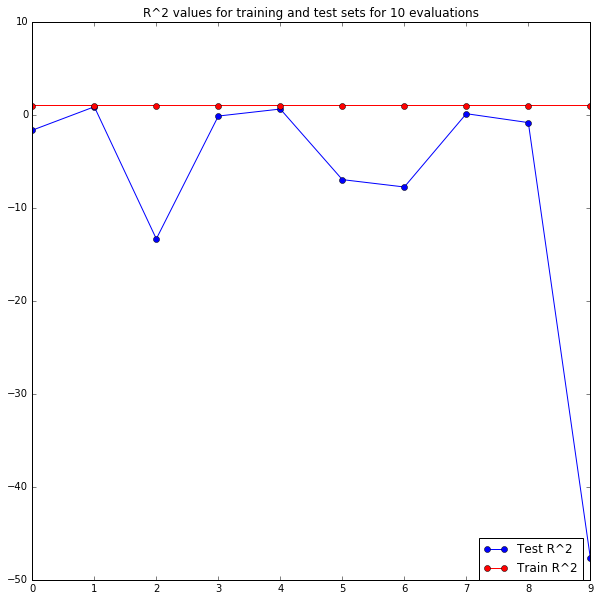

In [16]:
# Simulate for different splits:
# -------------------------------

# Initiate R^2 arrays for test and train
test_res = []
train_res=[]

# number of simulations:
n = 10

# Execute the simulation
for i in range(n):
    train , test = rand_split_fit_r_sq(data_2_expanded , 0.25)
    test_res.append(test)
    train_res.append(train)

# Results arrays
test_result = np.array(test_res) 
train_result = np.array(train_res)

# Visualization
x_axis = np.array(range(n))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(x_axis,test_result, 'bo-' , label = 'Test R^2')
ax.plot(x_axis,train_result, 'ro-', label = 'Train R^2')
ax.set_title('R^2 values for training and test sets for ' + str(n) + ' evaluations' )
plt.legend(loc = (0.8,0))

plt.show()

**Conclusion:**

The figure confirms the fact that the model is overfitting the training set and the model variance is very high for the test set.

Definetly a regularization will thame down the training set overfitting and regularize the model variance for the test set.

### Part (c): Apply Ridge regression

- Apply Ridge regression on the training set for different values of the regularization parameter $\lambda$ in the range $\{10^{-7}, 10^{-6}, \ldots, 10^7\}$. Evaluate the R^2 score for the models you obtain on both the train and test sets. Plot both values as a function of $\lambda$. 


- Explain the relationship between the regularization parameter and the training and test R^2 scores.


- How does the best test R^2 value obtained using Ridge regression compare with that of plain linear regression? Explain.

**Note**: You may use the `statsmodels` or `sklearn` to fit a ridge regression model and evaluate the fits.

### <font color ='blue'>Solution:</font>

<br>
**1. Standardize the data and form the training and test sets:**
<brdata>

In [18]:
# Extract the data array
data_raw_2 = data_2_expanded.values

# Standardization of the whole array
data_std_2 = data_raw_2 / data_raw_2.std(axis=0)

# cutoff for training and test:
cutoff = int(0.25 * data_std_2.shape[0])

# training set:
x_2_train = data_std_2[:cutoff, :-1]
y_2_train = data_std_2[:cutoff, -1]

# test set:
x_2_test = data_std_2[cutoff:, :-1]
y_2_test = data_std_2[cutoff:, -1]

**2. Perform the ridge regression for different lambda values:**
<br>

In [63]:
# Ridge Regression for different lambda values
# --------------------------------------------

# Initialize an array of values for the required range
lambda_range = np.array(range(-7, 8, 1))

# Initialize the trainand the test R^2 arrays
train_r_sq = np.zeros(lambda_range.shape)
test_r_sq = np.zeros(lambda_range.shape)

# Perform the evaluation of R^2 for different lambda
for i , lmb in enumerate(lambda_range):
    ridge_2 = Ridge_Reg(alpha = 10**lmb)
    ridge_2.fit(x_2_train, y_2_train)
    
    # Add the R^2 score values to the R^2 score arrays
    train_r_sq[i] = ridge_2.score(x_2_train, y_2_train)
    test_r_sq[i]  = ridge_2.score(x_2_test, y_2_test)

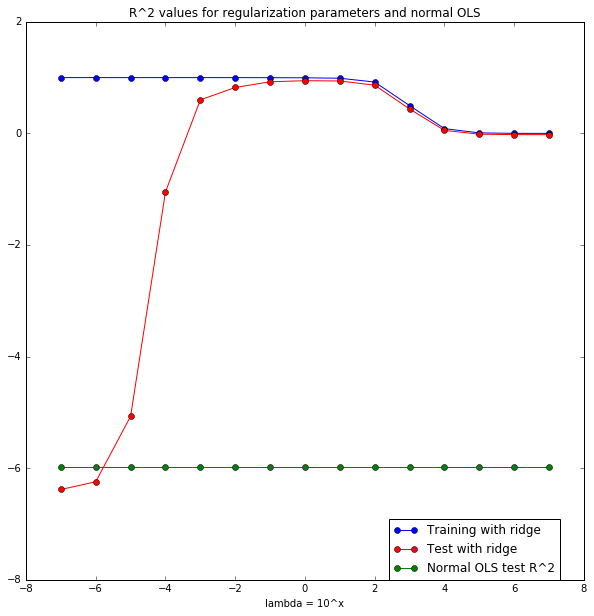

In [64]:
# Visualize the R^2 results for the test and train sets
# -----------------------------------------------------

# making an OLS case for plot purpose:
ols_r_sq = test_r_squared * np.ones(train_r_sq.shape)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.plot(lambda_range , train_r_sq , 'bo-' , label = 'Training with ridge')
ax.plot(lambda_range , test_r_sq , 'ro-' , label = 'Test with ridge')
ax.plot(lambda_range, ols_r_sq, 'go-' , label = "Normal OLS test R^2")
ax.set_title('R^2 values for regularization parameters and normal OLS')
ax.set_xlabel('lambda = 10^x')
ax.set_ylim([-8.0 , 2.0])
plt.legend(loc = (0.65,0))

plt.show()

In [65]:
# Display the results for best test data set fit:
# ----------------------------------------------

# index for best test R^2
n_best = np.argmax(test_r_sq)

# Best value of lambda:
lambda_best = 10**lambda_range[n_best]

# Summary array:
sum_array = pd.DataFrame((np.array([[train_r_sq[n_best] , test_r_sq[n_best] , test_r_squared ] ,
                      [lambda_best , lambda_best , 'None']])) , columns = [ 'reg_train' , 'reg_test' , 'normal_OLS'],
                         index = ['R_square' , 'Lambda'])

print '\nFor best R^2 score value on the test set:\n'
sum_array.style


For best R^2 score value on the test set:



**3. Analysis:**
<br>

**Relation between $R^2$ and $\lambda$:**

- Since the training set $R^2$ was originaly 1.0 applying $\lambda$ in the begining did not affect the training $R^2$ score.
- However, at high values of $\lambda$ exceeding 100, the model bias increased and the training $R^2$ began to decrease
- For the test set, the increase of $\lambda$ improved a lot the $R^2$ score since the model variance was reduced
- This trend continued until the $R^2$ value was very close to the training set. This was due to the fact that model reduced flexibility created an equal performance on both sets 
- At high values of $\lambda$ the bias took over and was dominant for the prediction error for both sets
- This was obvious from the similar behavior of the $R^2$ of both sets

**Difference between the regularized model and the plain OLS:**

- For the training set, the regularized model fit is obviously better than the plain OLS
- The previous section demonstrated that the OLS overfit the training data producing a test data fit ofextremly poor performance
- By adding the regulariztion, the dependency of the model on the training set decreased driving down the model variance and rendering it more convenient to fit the test set.
- This was manifested by the improvement of $R^2$ from -6.0 to 0.94
- At higher values of $\lambda$ the model bias increased and the $R^2$ decreased. However, the fit remained substantially better than the OLS.
<br><br>

### Part (d): Tune regularization parameter using cross-validation and bootstrapping
-  Evaluate the performance of the Ridge regression for different regularization parameters $\lambda$ using 5-fold cross validation **or** bootstrapping on the training set. 

    - Plot the cross-validation (CV) or bootstrapping R^2 score as a function of $\lambda$. 
    
    - How closely does the CV score or bootstrapping score match the R^2 score on the test set? Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?
    
    - Does the model chosen by CV or bootstrapping perform better than plain linear regression?

**Note**: You may use the `statsmodels` or `sklearn` to fit a linear regression model and evaluate the fits. You may also use `kFold` from `sklearn.cross_validation`. 

### <font color = 'blue'>Solution:</font>

<br>
**1. Analysis:**



In [66]:
# K-fold Cross Validation
# -----------------------

num_folds = 5.0

# initiate folds
kf = KFold(x_train.shape[0] , n_folds = num_folds)

# Intitate R^2 array
r_sq_cv = np.zeros(lambda_range.shape)

# Copy of the original train data
x_total = x_train
y_total = y_train

# Execute for each lambda
for i , lmb in enumerate(lambda_range):
    
    # Define the model with the selected lambda value
    rid = Ridge_Reg(alpha = 10**lmb)
    
    # Running summ for averaging
    test_sc = 0
    
    # Execute for each fold
    for ind_tr, ind_ts in kf:
        
        # Forming the train and test sets
        x_tr = x_total[ind_tr,:]
        y_tr = y_total[ind_tr]
        x_ts = x_total[ind_ts,:]
        y_ts = y_total[ind_ts]
        
        # Fit the model for the training
        rid.fit(x_tr, y_tr)
        
        # Calculate the test score and add it to the sum
        test_sc += rid.score(x_ts, y_ts)
        
    # Add the average to the R^2 array
    r_sq_cv[i] = test_sc / num_folds

**2. Visualization:**

In this section, we will visualize on the same plot the CV and test $R^2$. Also the OLS $R^2$ will be included for comparison



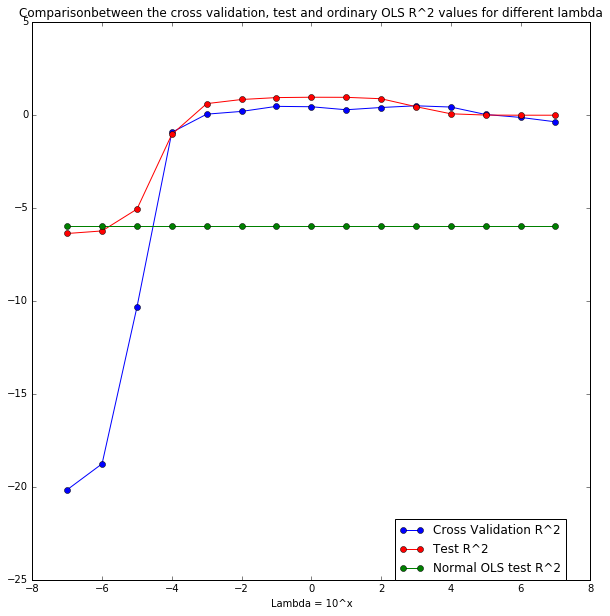

In [67]:
# Plot Generation
# ---------------

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111)

# Cross validation plot
ax.plot(lambda_range, r_sq_cv , 'bo-' , label = 'Cross Validation R^2')

# Test set plot
ax.plot(lambda_range, test_r_sq , 'ro-' , label = 'Test R^2')

# OLS R-squares
ax.plot(lambda_range, ols_r_sq, 'go-' , label = "Normal OLS test R^2")

# set titles and labels
ax.set_xlabel('Lambda = 10^x')
ax.set_title('Comparisonbetween the cross validation, test and ordinary OLS R^2 values for different lambda')
plt.legend(loc = (0.65,0))

plt.show()

**3. Results:**



In [68]:
print '\nResults:\n'
print 'Max CV R^2 score: ' , np.max(r_sq_cv)
print 'Min CV R^2 score: ' , np.min(r_sq_cv) 
print '\n'
print 'Max Test R^2 score: ' , np.max(test_r_sq)
print 'Min Test R^2 score: ' , np.min(test_r_sq)
print '\n'
print 'OLS R^2:  ' , test_r_squared 


Results:

Max CV R^2 score:  0.48429000988
Min CV R^2 score:  -20.1574095436


Max Test R^2 score:  0.944438790963
Min Test R^2 score:  -6.38155960196


OLS R^2:   -5.97542556705


**4. Conclusion:**

**How closely does the CV score or bootstrapping score match the R^2 score on the test set?**

- The CV R^2 exhibit the same behavior of test R^2 however, the value of the maximum CV R^2 is lower. The sample size for the k-fold could be a factor in this case. It is also seen in the amount of negative value the CV R^2 score exhibits at low value of lambda
- The similar behavior is a result of the effect of regularization on both

**Does the model with lowest CV score or bootstrapping score correspond to the one with maximum R^2 on the test set?**

- No, in fact the lowest CV score corresponds to the lowest test score. This is a result of the similarity in the behavior of both

**Does the model chosen by CV or bootstrapping perform better than plain linear regression?**

- Yes, when the test is considered. Again the regularization reduced the model variance and improved the fit.

## Problem 3: Ridge regression *via* ordinary least-squares regression

We present an approach to implement Ridge regression using oridinary least-squares regression. Given a matrix of responses $\mathbf{X} \in \mathbb{R}^{n\times p}$ and response vector $\mathbf{y} \in \mathbb{R}^{n}$, one can implement Ridge regression with regularization parameter $\lambda$ as follows:

- Augment the matrix of predictors $\mathbf{X}$ with $p$ new rows containing the scaled identity matrix $\sqrt{\lambda}\mathbf{I} \in \mathbb{R}^{p \times p}$, i.e.
$$\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
X_{11} & \ldots & X_{1p}\\
\vdots & \ddots & \vdots\\
X_{n1} & \ldots & X_{np}\\
\sqrt{\lambda} & \ldots & 0\\
\vdots & \ddots & \vdots\\
0 & \ldots & \sqrt{\lambda}
\end{bmatrix}
\,\in\,
\mathbb{R}^{(n+p)\times p}
.
$$


- Augment the response vector $\mathbf{y}$ with a column of $p$ zeros, i.e.
$$
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
y_{1}\\
\vdots\\
y_{n}\\
0\\
\vdots\\
0
\end{bmatrix}
\,\in\,
\mathbb{R}^{n+p}.
$$


- Apply ordinary least-squares regression on the augmented data set $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$.

### Part (a): Show the proposed approach implements Ridge regression
Show that the approach proposed above implements Ridge regression with parameter $\lambda$.

### <font color='blue'>Solution:</font>

<br>
- Applying the ordinary least square regression equation of the coefficients for the augmented matrices:

<br>
$$
\mathbf{B} = (\overline{\mathbf{X}}^{T}\overline{\mathbf{X}})^{-1}\overline{\mathbf{X}}^{T}\overline{\mathbf{y}}
$$


- By using the block matrix notation for $(\overline{\mathbf{X}}, \overline{\mathbf{y}})$ we can say that:

<br>
$$
\overline{\mathbf{X}} \,=\, 
\begin{bmatrix}
\mathbf{X}\\
\sqrt{\lambda}\mathbf{I}
\end{bmatrix}   , \ 
\overline{\mathbf{y}} \,=\, 
\begin{bmatrix}
\mathbf{y}\\
\mathbf{0}
\end{bmatrix} 
$$


- Considering the transpose of $\begin{bmatrix}\mathbf{X}\\\sqrt{\lambda}\mathbf{I}\end{bmatrix}$ to be $\begin{bmatrix}\mathbf{X}^{T} & \sqrt{\lambda}\mathbf{I}\end{bmatrix}$ as $\mathbf{I}$ is diagonal
<br>


- Then substituting in the coefficients equation, we have:

<br>
$$
\mathbf{B} = (
\begin{bmatrix}
\mathbf{X}^{T} & \sqrt{\lambda}\mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\mathbf{X} \\
\sqrt{\lambda}\mathbf{I}
\end{bmatrix})^{-1}
\begin{bmatrix}
\mathbf{X}^{T} & \sqrt{\lambda}\mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\mathbf{y}\\
\mathbf{0}
\end{bmatrix}
$$


- Which by performing the inner product yields to:

<br>
$$
\mathbf{B} = (
\mathbf{X}^{T}\mathbf{X} + \lambda\mathbf{I})^{-1}
\mathbf{X}^{T}
\mathbf{y}
$$


- Which is the closed form expression to calculate the coefficients for ridge regularization regression

### Part (b): Debug our implementation of ridge regression
You're a grader for CS109A, the following is an implemention of Ridge regression (via the above approach) submitted by a student. The dataset is ``dataset_3.txt``. The regression model is fitted to a training set, and the R^2 scores of the fitted model on the training and test sets are plotted as a function of the regularization parameter. Grade this solution according to the following rubric (each category is equally weighted): 

- correctness

- interpretation (if applicable)

- code/algorithm design

- presentation

In addition to providing an holistic grade (between 0 to 5), provide a corrected version of this code that is submission quality.

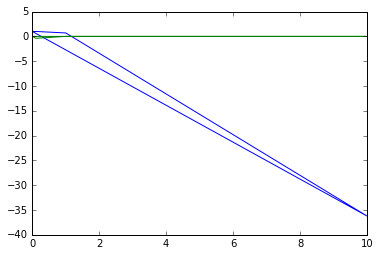

In [69]:
# Fit
def ridge(x_train, y_train, reg_param):
    n=np.shape(x_train)[0]
    x_train=np.concatenate((x_train,reg_param*np.identity(n)),axis=1)
    y_train_=np.zeros((n+np.shape(x_train)[1],1))
    for c in range(n):
        y_train_[c]= y_train[c]
    import sklearn
    model = sklearn.linear_model.LinearRegression()
    model.fit(x_train,y_train.reshape(-1,1))
    return model

# Score
def score(m,x_test,y_test, reg_param):
    n=np.shape(x_train)[0]
    x_test=np.concatenate((x_test,reg_param*np.identity(n)),axis=1)
    y_test_=np.zeros((n+np.shape(x_test)[1],1))
    for c in range(n):
        y_test_[c]= y_test[c]
    return m.score(x_test,y_test.reshape(-1,1))

# Load
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',')
n = data.shape[0]
n = int(np.round(n*0.5))
x_train = data[0:n,0:100]
y_train = data[0:n,100]
x_test = data[n:2*n,0:100]
y_test = data[n:2*n,100]

# Params
a=np.zeros(5)
for i in range(-2,2):
    a[i+2]=10**i

# Iterate
rstr =np.zeros(5)
rsts =np.zeros(5)
for j in range(0,5):    
    m =ridge(x_train,y_train,a[i])
    rstr[j]=score(m,x_train,y_train,a[j])
    rsts[i]=score(m,x_test,y_test,a[i])

# Plot
plt.plot(a,rstr)
plt.plot(a,rsts)

## Challenge Problem: Predicting Outcome of a Fund-raising Campaign
You are provided a data set containing details of mail sent to 95,412 potential donors for a fund-raising campaign of a not-for-profit organization. This data set also contains the amount donated by each donor. The task is to build a model that can estimate the amount that a donor would donate using his/her attributes. The data is contained in the file `dataset_4.txt`. Each row contains 376 attributes for a donor, followed by the donation amount.

**Note**: For additional information about the attributes used, please look up the file `dataset_4_description.txt`. This files also contains details of attributes that have been omitted from the data set.

### Part (a): Fit regression model
Build a suitable model to predict the donation amount. How good is your model? 


### Part (b): Evaluate the total profit of the fitted model
Suppose you are told that the cost of mailing the donor is \$7. Use your model to maximize profit. Implement, explain and rigorously justify your strategy. How does your strategry compare with blanket mailing everyone.

### Part (c): Further Discussion
In hindsight, thoroughly discuss the appropriatenes of using a regression model for this dataset (you must at least address the suitability with respect to profit maximization and model assumptions). Rigorously justify your reasoning. 